# Consecuencias de las transformaciones de Lorentz
<a target="_blank" href="https://colab.research.google.com/github/andromedalactea/relativityGravitationAndCosmology/blob/main/notebooks/N03_20250422_Consequences_Lorentz_Cap1.3_RelGrav.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


**Curso:** Relatividad y Gravitación  

**Fecha:** 2025-04-20

**Notebook:** 03 

**Capítulo y sección del libro:** Capítulo 1, Sección 1.3  

**Tema:** Dilatación temporal, Contracción de distancias, Relatividad de la simultaneidad, Efecto Doppler y transformación de velocidad

Instalando las librerias necesarias

In [1]:
!pip install -q numpy ipywidgets plotly nbformat>=4.2.0 anywidget sympy

Configuraciones de google Colab 

In [2]:
try:
  from google.colab import output
  IN_COLAB = True
  output.enable_custom_widget_manager()
except ImportError:
  IN_COLAB = False

Importando las librerias necesarias

In [3]:
import numpy as np
import sympy as sp
import warnings
import ipywidgets as widgets
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.graph_objects as go
from IPython.display import display, Markdown, clear_output

warnings.filterwarnings('ignore')
sp.init_printing(use_latex='mathjax')

## 1.3 Consecuencias de las Transformaciones de Lorentz

Las transformaciones de Lorentz aplicadas a fenómenos específicos generan efectos que desafían por completo la física clásica:

1. **Dilatación del tiempo**  
   - El intervalo temporal medido en un marco en el que un reloj se mueve es mayor que el intervalo propio.  
   - En la práctica, los relojes en movimiento parecen “andar más lento” que los que están en reposo en sus propios marcos.

2. **Contracción de las longitudes**  
   - La longitud de un objeto medida en un marco donde éste se mueve es menor que su longitud propia (medida en su propio marco de reposo).  
   - Muestra que las distancias no son absolutas: dependen del estado de movimiento relativo del objeto y del observador.

3. **Relatividad de la simultaneidad**  
   - Dos eventos que ocurren “al mismo tiempo” en un marco pueden no ser simultáneos en otro que se mueva a velocidad constante respecto al primero.  
   - Pone de manifiesto que el concepto de simultaneidad es también relativo al observador.

4. **Efecto Doppler relativista**  
   - La frecuencia de una onda electromagnética cambia si la fuente y el receptor están en movimiento relativo.
   - Para una fuente que se aleja del observador, la frecuencia medida es menor (*corrimiento al rojo*), y si se acerca, es mayor (*corrimiento al azul*).


> **Importante:** Por muy precisas que sean las herramientas de medición, **toda medida de tiempo o distancia debe especificar el marco inercial** en que se realiza. Ni el “tiempo” ni la “longitud” son magnitudes absolutas; ambas dependen del observador y de su movimiento relativo.


Factor gamma: 1.25
Vida media en reposo: 2.2 μs
Vida media dilatada (Marco de referencia del laboratorio): 2.75 μs
En proporción, el muón en el laboratorio vive 1.25 veces más que el muón en reposo


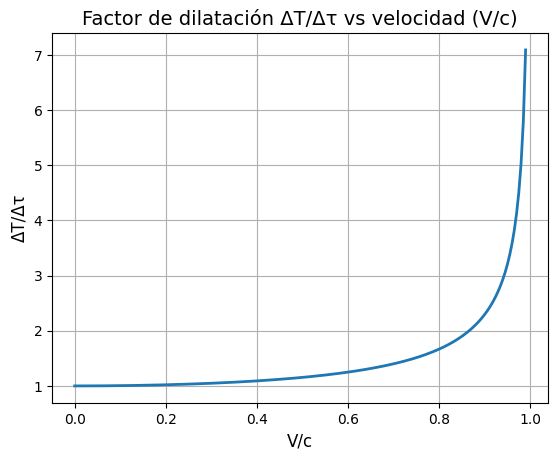

In [4]:
# Parámetro de vida media propia del muón (en μs)
tau = 2.2  
c = 1 # velocidad de la luz en unidades de c

# Para una velocidad V de 3c/5
V = 3*c/5
gamma = 1 / np.sqrt(1 - V**2/c**2)

T_dilatada = gamma * tau

print(f"Factor gamma: {gamma:.2f}")
print(f"Vida media en reposo: {tau} μs")
print(f"Vida media dilatada (Marco de referencia del laboratorio): {T_dilatada:.2f} μs")
print(f"En proporción, el muón en el laboratorio vive {T_dilatada/tau:.2f} veces más que el muón en reposo")

## Ahora vamos a graficar la dilatación del tiempo en función de la velocidad
V = np.linspace(0, 0.99, 200)
gamma = 1 / np.sqrt(1 - V**2)
T_dilatada = gamma * tau


# Gráfica 2: Relación ΔT/Δτ (factor γ) vs V/c
plt.figure()
plt.plot(V, T_dilatada / tau, linewidth=2)
plt.xlabel('V/c', fontsize=12)
plt.ylabel('ΔT/Δτ', fontsize=12)
plt.title('Factor de dilatación ΔT/Δτ vs velocidad (V/c)', fontsize=14)
plt.grid(True)
plt.show()

El gráfico anterior representa que tanto vive el muón en el laboratorio en comparación con el muón en reposo, y es curioso pero esta proporción es precisamente el factor gamma, descubriendo una nueva forma de interpreatación de este factor; además podemos darnos cuneta que a medida que la velocidad de la perticula se acerca a la de la luz esta dilatación es mayor generando que  las particulas vivan ucho más en relación al marco de referencia del laboratorio

El siguiente gráfico muestra un efecto muy interesante para las partículas que viajan a velocidades cercanas a la de la luz: el tiempo de vida medido en su propio marco muchas veces no basta para que lleguen hasta la superficie terrestre y sean detectadas por un sensor en tierra. Sin embargo, al considerar la dilatación temporal desde el punto de vista de un observador en la superficie, ese mismo tiempo de vida se alarga, permitiendo que la partícula complete el viaje y alcance los detectores.

In [10]:
def plot_relativistic_journey(V_frac, delta_tau, H_atmos):
    """Costruye la animación del viaje de una particula relativista en la atmosfera."""
    # Constantes
    C_KM_PER_MUS = 0.299792   # km/µs
    TIME_SCALE_FACTOR = 0.1   # factor de ralentización
    N_FRAMES = 200            # número de cuadros de animación
    
    # Calcular factor de Lorentz gamma
    if abs(V_frac) >= 1.0 or (1.0 - V_frac**2) <= 0:
        gamma = float("inf")
    else:
        gamma = 1.0 / np.sqrt(1.0 - V_frac**2)
    
    # Cantidades en el marco del laboratorio
    V_abs = V_frac * C_KM_PER_MUS
    T_lab = gamma * delta_tau if gamma != float("inf") else 0.0
    T_ground = H_atmos / V_abs if V_abs > 0 else float("inf")
    T_event = min(T_lab, T_ground)  # tiempo de decaimiento o llegada al suelo
    
    # Arreglos de tiempo
    t_anim = np.linspace(0, max(T_lab, T_ground) / TIME_SCALE_FACTOR, N_FRAMES)
    t_lab = t_anim * TIME_SCALE_FACTOR
    
    # Posiciones y tiempo propio
    y_pos = H_atmos - V_abs * np.minimum(t_lab, T_lab)
    tau_vals = np.minimum(t_lab, T_lab) / gamma if gamma != float("inf") else np.zeros_like(t_lab)
    
    # Resultado
    reaches = T_ground <= T_lab
    y_event = H_atmos - V_abs * T_event
    
    # Trazos base
    traces = [
        go.Scatter(x=[-1, 1], y=[0, 0], mode="lines",
                   line=dict(color="green", width=4), name="Superficie"),
        go.Scatter(x=[-1, 1], y=[H_atmos, H_atmos], mode="lines",
                   line=dict(color="lightblue", width=4, dash="dash"), name="Tope Atmósfera"),
        go.Scatter(x=[0, 0], y=[H_atmos, H_atmos], mode="lines",
                   line=dict(color="grey", width=1, dash="dot"), name="Trayectoria"),
        go.Scatter(x=[0], y=[H_atmos], mode="markers",
                   marker=dict(color="red", size=10), name="Partícula"),
        go.Scatter(x=[0], y=[None], mode="markers",
                   marker=dict(color="black", size=12, symbol="x"), name="Decaimiento"),
    ]
    
    # Construir cuadros
    frames = []
    for i, (y_i, t_l, tau_i) in enumerate(zip(y_pos, t_lab, tau_vals)):
        # Limitar tiempo mostrado al evento
        t_display = min(t_l, T_event)
        # Determinar estado y marcador de decaimiento
        if t_l < T_event:
            state, color, decay_y = "En vuelo", "blue", [None]
        else:
            state = "¡LLEGÓ!" if reaches else "¡DECAYÓ!"
            color = "green" if reaches else "red"
            decay_y = [0] if reaches else [y_event]
        
        # Anotaciones
        annotation = [
            dict(text=f"V/c={V_frac:.3f}, γ={gamma:.2f}, Δτ={delta_tau:.2f}µs, H={H_atmos:.1f}km",
                 x=0.01, y=1.12, xref="paper", yref="paper", showarrow=False),
            dict(text=f"t={t_display:.3f}µs, τ={tau_i:.3f}µs",
                 x=0.01, y=1.06, xref="paper", yref="paper", showarrow=False),
            dict(text=state, x=0.99, y=1.05, xref="paper", yref="paper",
                 showarrow=False, font=dict(color=color, size=14)),
        ]
        
        frames.append(go.Frame(
            data=[
                traces[0].update(y=[0, 0]),
                traces[1].update(y=[H_atmos, H_atmos]),
                go.Scatter(x=[0, 0], y=[H_atmos, y_i], mode="lines",
                           line=dict(color="grey", width=1, dash="dot")),
                go.Scatter(x=[0], y=[y_i], mode="markers",
                           marker=dict(color="red", size=10)),
                go.Scatter(x=[0], y=decay_y, mode="markers",
                           marker=dict(color="black", size=12, symbol="x")),
            ],
            name=str(i),
            layout=dict(annotations=annotation)
        ))
    
    # Pasos del deslizador
    slider = [dict(
        steps=[dict(
            method="animate",
            args=[[str(k)],
                  dict(mode="immediate",
                       frame=dict(duration=50, redraw=True),
                       transition=dict(duration=0))],
            label=f"{t_anim[k]:.1f}"
        ) for k in range(N_FRAMES)],
        currentvalue=dict(prefix="t_anim="),
        x=0, y=0
    )]
    
    # Diseño con botón de reproducción
    layout = go.Layout(
        title="Viaje de Partícula Relativista en la Atmósfera",
        xaxis=dict(range=[-0.5, 0.5], showticklabels=False, zeroline=False),
        yaxis=dict(range=[-1, H_atmos * 1.1], title="Altitud (km)"),
        updatemenus=[dict(
            type="buttons",
            showactive=False,
            y=1.05,
            x=1.15,
            xanchor="right",
            yanchor="top",
            buttons=[dict(
                label="Play",
                method="animate",
                args=[None, dict(frame=dict(duration=50, redraw=True),
                                 transition=dict(duration=0),
                                 fromcurrent=True,
                                 mode="immediate")]
            )]
        )],
        sliders=slider,
        margin=dict(r=200)
    )

    fig = go.Figure(data=traces, layout=layout, frames=frames)
    fig.show()


# Widgets para parámetros
V_input = widgets.FloatText(value=0.995, description="V/c:", style={'description_width':'auto'})
delta_tau_input = widgets.FloatText(value=2.2, description="Δτ (µs):", style={'description_width':'auto'})
H_input = widgets.FloatText(value=10.0, description="H (km):", style={'description_width':'auto'})

ui = widgets.VBox([
    widgets.HTML("<b>Parámetros:</b>"),
    widgets.HBox([V_input, delta_tau_input, H_input])
])

out = widgets.Output()
def wrapped(V_frac, delta_tau, H_atmos):
    with out:
        clear_output(wait=True)
        plot_relativistic_journey(V_frac, delta_tau, H_atmos)

widgets.interactive_output(
    wrapped,
    {'V_frac': V_input, 'delta_tau': delta_tau_input, 'H_atmos': H_input}
)

# Mostrar controles y salida
display(ui, out)

Output()

## 1.3.2 Contracción de la Longitud

Uno de los efectos notables derivados de las transformaciones de Lorentz es la **contracción de la longitud**. Este fenómeno implica que la longitud medida de un objeto depende del marco de referencia inercial desde el cual se realiza la medición. Lo que implica que segun la relatividad las medidas físicas de longitudes también deben de reportarse en el marco de referencia que se hicieron ya que los resultados pueden variar entre marcos.

Para analizarlo, es fundamental definir cómo se mide la longitud:

*   **Definición de Longitud:** En cualquier marco de referencia inercial, la longitud de un objeto (por ejemplo, una varilla) es la distancia espacial entre sus puntos extremos medida **en un único instante de tiempo** (simultáneamente) según los relojes de ese marco.

Consideremos la medición de una varilla desde dos marcos inerciales en configuración estándar:

*   **Marco S (Laboratorio):** La varilla se mueve con velocidad constante V a lo largo del eje x.
*   **Marco S' (Reposo):** La varilla está en reposo, orientada a lo largo del eje x'.

**Medición de la Longitud $L$ en S:**

*   Para medir la longitud $L$ en el marco S, determinamos la posición de los extremos de la varilla *simultáneamente* en un tiempo $t$ de S.
*   Evento 1: Ocurre en el extremo izquierdo en $(t, x_1)$.
*   Evento 2: Ocurre en el extremo derecho en $(t, x_2)$.
*   La longitud medida en S es:
    $L = x_2 - x_1 = \Delta x$
*   El intervalo de tiempo entre estos dos eventos de medición en S es:
    $\Delta t = t - t = 0$

**Descripción de los *mismos* eventos en S' (Marco de Reposo):**

*   Observamos los mismos dos eventos (la determinación simultánea de los extremos en S) desde el marco S', donde la varilla está en reposo.
*   En S', la varilla no se mueve, por lo que la distancia entre sus extremos es constante e igual a su **longitud propia**, $L_P$.
*   Los eventos 1 y 2 ocurren en las posiciones $x'_1$ y $x'_2$ (que son los extremos fijos de la varilla en S').
*   El intervalo espacial entre estos dos eventos en S' es:
    $L_P = x'_2 - x'_1 = \Delta x'$
*   *Importante*: Aunque los eventos 1 y 2 son simultáneos en S ($\Delta t = 0$), **no son necesariamente simultáneos** en S' ($\Delta t'$ puede ser distinto de cero). Sin embargo, esto no afecta la definición de $L_P$ como la separación espacial constante de los extremos en el marco de reposo.

**Aplicación de la Transformación de Intervalos:**

*   Utilizamos la regla de transformación para el intervalo espacial (Ecuación 1.33 del libro):
    $$ \Delta x' = \gamma(V) (\Delta x - V \Delta t) $$
    donde $\gamma(V) = \frac{1}{\sqrt{1 - V^2/c^2}}$.
*   Sustituimos los intervalos conocidos que hemos definido:
    *   $\Delta x' = L_P$
    *   $\Delta x = L$
    *   $\Delta t = 0$
*   La ecuación queda:
    $$ L_P = \gamma(V) (L - V \cdot 0) $$
    $$ L_P = \gamma(V) L $$

**Resultado y Conclusión:**

*   Despejando $L$ de la relación anterior, obtenemos la fórmula de la contracción de la longitud:
    $$ L = \frac{L_P}{\gamma(V)} $$
*   Esto significa que la longitud $L$ de la varilla medida en el marco S (donde se mueve) es *menor* que su longitud propia $L_P$ medida en su marco de reposo S', ya que $\gamma(V) > 1$ para $V > 0$.
*   Así que, en resumen un objeto en movimiento **aparece contraído** en su dirección de movimiento cuando se mide desde un marco respecto al cual se mueve. La contracción es mayor cuanto más cercana sea su velocidad $V$ a la velocidad de la luz $c$.
*   Las dimensiones perpendiculares a la dirección del movimiento no se ven afectadas.

---


**Ejercicio 1.5**

Existe una forma alternativa de definir la longitud en el marco S basada en dos eventos, 1 y 2, que ocurren en *tiempos diferentes* en ese marco. Supongamos que el evento 1 ocurre en $x=0$ cuando el extremo frontal de la varilla pasa por ese punto, y el evento 2 también ocurre en $x=0$ pero en el tiempo posterior cuando el extremo trasero pasa por ese punto. Así, el evento 1 está en $(t_1, 0)$ y el evento 2 está en $(t_2, 0)$ en el marco S. Dado que la varilla se mueve con velocidad uniforme $V$ en el marco S, podemos definir la longitud de la varilla, medida en S, mediante la relación $L = V (t_2 - t_1)$.

Utilice esta definición alternativa de longitud en el marco S para establecer que la longitud de una varilla en movimiento es menor que su longitud propia ($L_P$).

---

En el marco de referencia S (laboratorio), definimos dos eventos en la misma posición $x=0$: el evento 1 en $t_1$ (paso del extremo frontal) y el evento 2 en $t_2$ (paso del extremo trasero). El intervalo temporal en S es $\Delta t = t_2 - t_1$ y el intervalo espacial es $\Delta x = 0$. La longitud medida según esta definición es $L = V \Delta t$.

Ahora analizamos estos mismos eventos desde el marco S' (reposo de la varilla). En S', la varilla tiene su longitud propia $L_P$. El evento 1 ocurre en la posición del extremo frontal ($x'_1$) y el evento 2 en la posición del extremo trasero ($x'_2$). Por lo tanto, el intervalo espacial entre estos eventos en S' es $\Delta x' = x'_2 - x'_1 = -L_P$.

Aplicamos la transformación de Lorentz para el intervalo espacial: $\Delta x' = \gamma(V)(\Delta x - V \Delta t)$. Sustituyendo los intervalos que conocemos ($\Delta x' = -L_P$ y $\Delta x = 0$), obtenemos:
$$ -L_P = \gamma(V)(0 - V \Delta t) = -\gamma(V) V \Delta t $$
Entonces  $L_P = \gamma(V) V \Delta t$.

Finalmente, usamos la definición de longitud proporcionada en el enunciado, $L = V \Delta t$, Al reemplzar se puede obtener que:
$$ L = \frac{L_P}{\gamma(V)} $$
Dado que $\gamma(V) > 1$ para $V > 0$, esto confirma que la longitud $L$ medida en el marco S mediante este método alternativo también resulta ser menor que la longitud propia $L_P$. La varilla en movimiento se mide como contraída.

A continuación, se explora la **contracción de la longitud**, usando un coche. Este efecto establece que la longitud medida de un objeto disminuye en la dirección de su movimiento relativo respecto al observador, y esta disminución es más pronunciada a velocidades cercanas a la de la luz.

In [6]:
# Funciones auxiliares
def calculate_gamma(V_frac, c=1.0):
    V_frac = float(V_frac)
    if abs(V_frac) >= 1.0:
        return float('inf')
    beta_sq = V_frac**2
    if 1.0 - beta_sq <= 1e-15:
        return float('inf')
    return 1.0 / np.sqrt(1.0 - beta_sq)

def get_car_shape_coords(length, height):
    if length <= 1e-9:
        length = 1e-9
    wheel_radius = height * 0.18
    body_bottom_y = wheel_radius
    body_top_y = height * 0.6
    roof_y = height
    hood_x = length * 0.3
    roof_start_x = length * 0.35
    roof_end_x = length * 0.8
    trunk_x = length * 0.85

    body_x = [0, length, length, trunk_x, roof_end_x,
             roof_start_x, hood_x, 0, 0]
    body_y = [body_bottom_y, body_bottom_y, body_top_y, body_top_y,
             roof_y, roof_y, body_top_y, body_top_y, body_bottom_y]

    wheel1_x = length * 0.2
    wheel2_x = length * 0.75
    wheel_y = wheel_radius
    return (np.array(body_x), np.array(body_y),
            wheel1_x, wheel2_x, wheel_y, wheel_radius)

# Constantes
CAR_H = 2.0
Y_OFF_LP = CAR_H * 0.7
Y_OFF_L = -CAR_H * 0.7

# Configuración de widgets
Lp_box = widgets.BoundedFloatText(
    value=10.0, min=1.0, max=50, step=0.5,
    description='Lp:', layout=widgets.Layout(width='160px')
)
v_slider = widgets.FloatSlider(
    value=0.0, min=0.0, max=0.999, step=0.005,
    readout_format='.3f', description='V/c:',
    layout=widgets.Layout(width='500px')
)

# Cálculos iniciales
initial_Lp = Lp_box.value
initial_v_frac = v_slider.value
initial_gamma = calculate_gamma(initial_v_frac)
initial_L = initial_Lp / initial_gamma if not np.isinf(initial_gamma) else 0

# Coordenadas en reposo (azul)
bx_lp_init, by_lp_init, w1x_lp_init, w2x_lp_init, wy_lp_init, wr_lp_init = (
    get_car_shape_coords(initial_Lp, CAR_H)
)
bx_lp_init -= initial_Lp / 2
by_lp_init = by_lp_init - CAR_H / 2 + Y_OFF_LP
wheels_x_lp_init = [w1x_lp_init - initial_Lp / 2, w2x_lp_init - initial_Lp / 2]
wheels_y_lp_init = [wy_lp_init - CAR_H / 2 + Y_OFF_LP] * 2

# Coordenadas contraídas (rojo)
bx_L_init, by_L_init, w1x_L_init, w2x_L_init, wy_L_init, wr_L_init = (
    get_car_shape_coords(initial_L, CAR_H)
)
bx_L_init -= initial_L / 2
by_L_init = by_L_init - CAR_H / 2 + Y_OFF_L
wheels_x_L_init = [w1x_L_init - initial_L / 2, w2x_L_init - initial_L / 2]
wheels_y_L_init = [wy_L_init - CAR_H / 2 + Y_OFF_L] * 2

initial_margin = initial_Lp * 0.15
initial_extra_text = (
    f"γ = {initial_gamma:.3f}" if not np.isinf(initial_gamma) else "γ = ∞"
) + f"    L = {initial_L:.3f}"

# Crear figura
fig = go.FigureWidget(
    data=[
        # Coche en reposo (azul) - cuerpo
        go.Scatter(
            x=bx_lp_init, y=by_lp_init, mode='lines', fill='toself',
            fillcolor='rgba(0,0,255,0.6)', line=dict(color='darkblue', width=2),
            name='Coche en reposo (Lp)'
        ),
        # Coche en reposo (azul) - ruedas
        go.Scatter(
            x=wheels_x_lp_init, y=wheels_y_lp_init, mode='markers',
            marker=dict(color='black', size=wr_lp_init * 20), showlegend=False
        ),
        # Coche en movimiento (rojo) - cuerpo
        go.Scatter(
            x=bx_L_init, y=by_L_init, mode='lines', fill='toself',
            fillcolor='rgba(255,0,0,0.6)', line=dict(color='darkred', width=2),
            name='Coche en movimiento (L)'
        ),
        # Coche en movimiento (rojo) - ruedas
        go.Scatter(
            x=wheels_x_L_init, y=wheels_y_L_init, mode='markers',
            marker=dict(color='black', size=wr_L_init * 20), showlegend=False
        )
    ],
    layout=go.Layout(
        title="Contracción de la longitud: coche en reposo vs. en movimiento",
        xaxis=dict(
            range=[-initial_Lp / 2 - initial_margin, initial_Lp / 2 + initial_margin],
            title="Longitud - posición", scaleratio=1
        ),
        yaxis=dict(
            range=[-CAR_H * 1.5, CAR_H * 1.5], showticklabels=False,
            title="Dimensión vertical (fija)", scaleratio=1
        ),
        width=800, height=450, margin=dict(l=50, r=50, t=60, b=40),
        hovermode=False,
        showlegend=True,
        legend=dict(x=1.02, y=1, xanchor='left', yanchor='top'),
        annotations=[
            go.layout.Annotation(
                text=initial_extra_text,
                showarrow=False, xref='paper', yref='paper',
                x=0.02, y=1.08, font=dict(size=12),
                align='left'
            )
        ]
    )
)

def update_plot(change):
    Lp = Lp_box.value
    v_frac = v_slider.value
    γ = calculate_gamma(v_frac)
    L = Lp / γ if not np.isinf(γ) else 0

    # Actualizar coordenadas en reposo
    bx_lp, by_lp, w1x_lp, w2x_lp, wy_lp, wr_lp = get_car_shape_coords(Lp, CAR_H)
    bx_lp -= Lp / 2
    by_lp = by_lp - CAR_H / 2 + Y_OFF_LP
    wheels_x_lp = [w1x_lp - Lp / 2, w2x_lp - Lp / 2]
    wheels_y_lp = [wy_lp - CAR_H / 2 + Y_OFF_LP] * 2

    # Actualizar coordenadas contraídas
    bx_L, by_L, w1x_L, w2x_L, wy_L, wr_L = get_car_shape_coords(L, CAR_H)
    bx_L -= L / 2
    by_L = by_L - CAR_H / 2 + Y_OFF_L
    wheels_x_L = [w1x_L - L / 2, w2x_L - L / 2]
    wheels_y_L = [wy_L - CAR_H / 2 + Y_OFF_L] * 2

    margin = Lp * 0.15
    extra_text = (f"γ = {γ:.3f}" if not np.isinf(γ) else "γ = ∞") + \
                 f"    L = {L:.3f}"

    with fig.batch_update():
        fig.data[0].x = bx_lp
        fig.data[0].y = by_lp
        fig.data[1].x = wheels_x_lp
        fig.data[1].y = wheels_y_lp
        fig.data[2].x = bx_L
        fig.data[2].y = by_L
        fig.data[3].x = wheels_x_L
        fig.data[3].y = wheels_y_L
        fig.layout.xaxis.range = [-Lp / 2 - margin, Lp / 2 + margin]
        fig.layout.annotations[0].text = extra_text

# Configurar actualizaciones
v_slider.observe(update_plot, names='value')
Lp_box.observe(update_plot, names='value')

# Mostrar interfaz
display(fig)
display(widgets.VBox([widgets.HBox([Lp_box, v_slider])]))

FigureWidget({
    'data': [{'fill': 'toself',
              'fillcolor': 'rgba(0,0,255,0.6)',
              'line': {'color': 'darkblue', 'width': 2},
              'mode': 'lines',
              'name': 'Coche en reposo (Lp)',
              'type': 'scatter',
              'uid': 'd9a5690f-5542-488e-a997-be488fc0d594',
              'x': array([-5. ,  5. ,  5. ,  3.5,  3. , -1.5, -2. , -5. , -5. ]),
              'y': array([0.76, 0.76, 1.6 , 1.6 , 2.4 , 2.4 , 1.6 , 1.6 , 0.76])},
             {'marker': {'color': 'black', 'size': 7.199999999999999},
              'mode': 'markers',
              'showlegend': False,
              'type': 'scatter',
              'uid': 'f14d588f-9050-4a3b-82d5-c2f5a41f015b',
              'x': [-3.0, 2.5],
              'y': [0.7599999999999999, 0.7599999999999999]},
             {'fill': 'toself',
              'fillcolor': 'rgba(255,0,0,0.6)',
              'line': {'color': 'darkred', 'width': 2},
              'mode': 'lines',
              'nam

## 1.3.3 La Relatividad de la Simultaneidad
Como se señaló en la discusión sobre la contracción de la longitud, dos eventos que ocurren al mismo tiempo en un marco de referencia no necesariamente ocurren al mismo tiempo en otro marco. De hecho, si recurrimos a las reglas de transformación de intervalos, queda claro que si se observa que los eventos 1 y 2 ocurren al mismo tiempo en el marco S (de modo que Δt = 0) pero están separados por una distancia L a lo largo del eje x, entonces en el marco S' estarán separados por el intervalo de tiempo:
$$ \Delta t' = -\gamma(V) \frac{VL}{c^2} $$
Se dice que dos eventos que ocurren al mismo tiempo en algún marco son **simultáneos** en ese marco. El resultado anterior muestra que la condición de ser simultáneo es relativa y no absoluta; dos eventos que son simultáneos en un marco no son necesariamente simultáneos en cualquier otro marco. Esta consecuencia de las transformaciones de Lorentz se conoce como la **relatividad de la simultaneidad**.
Esto tiene profundas implicaciones, ya que nuestra noción intuitiva de un "ahora" universal, válido para todos los observadores, se desvanece. Lo que es "ahora" para un observador depende de su estado de movimiento.

---

## 1.3.4 Efecto Doppler Relativista

 El efecto Doppler describe cómo la frecuencia (o longitud de onda) de una onda cambia debido al movimiento relativo entre la fuente emisora y el receptor. Aunque conocido en la física clásica (como el cambio de tono de una sirena de una ambulancia), la relatividad especial introduce una  más precisa, especialmente relevante para ondas electromagnéticas osea la luz.

 **Configuración:**
 *   **Marco S:** La fuente (ej. una lámpara) está en reposo en el origen, emitiendo ondas con una frecuencia emitida $f_{em}$ (Y peridoo $T_{em} = 1/f_{em} = \Delta t$).
 *   **Marco S':** El receptor (ej. un detector) está en reposo en su origen y se aleja de S con velocidad constante $V$ (en configuración estándar). Mide una frecuencia recibida $f_{rec}$ (con período $T'_{rec} = 1/f_{rec}$).

 **Analizando la perspectiva del Receptor (S'):**

 Analizamos el proceso desde el punto de vista del receptor S', ya que nos interesa el período $T'_{rec}$ que el detector mide entre la llegada de dos nodos (o crestas) de onda consecutivos.

-    **Tiempo entre Emisiones (visto por S'):** Debido a la dilatación temporal del proceso de emisión que ocurre en S, el tiempo que S' mide entre la emisión de dos nodos consecutivos por parte de S es mayor que el período propio $T_{em}$. Este intervalo en S' es:
     $$ \Delta t' = \gamma(V) T_{em} = \frac{\gamma(V)}{f_{em}} $$

-    **Distancia Adicional Recorrida por S':** Durante este intervalo de tiempo $\Delta t'$ (entre que S emitió el primer nodo y emitió el segundo), el receptor S' se ha alejado una distancia adicional $\Delta D$ del punto donde se emitió el segundo nodo (en comparación con donde estaba cuando se emitió el primero). Esta distancia es:
     $$ \Delta D = V \Delta t' $$

-    **Tiempo Adicional de Viaje para la Onda (medido por S'):** El segundo nodo emitido tiene que viajar esta distancia extra $\Delta D$ para alcanzar al receptor S'. Dado que la relatividad postula que S' mide la velocidad de la luz que le llega como $c$, el tiempo adicional necesario para cubrir $\Delta D$ es:
     $$ \Delta T'_{extra} = \frac{\Delta D}{c} = \frac{V \Delta t'}{c} $$

-    **Período Total Recibido (medido por S'):** El tiempo total que mide S' entre la llegada del primer nodo y la llegada del segundo nodo es el tiempo base entre emisiones ($\Delta t'$) más el tiempo adicional ($\Delta T'_{extra}$) debido al alejamiento:
     $$ T'_{rec} = \Delta t' + \Delta T'_{extra} = \Delta t' + \frac{V \Delta t'}{c} = \Delta t' \left(1 + \frac{V}{c}\right) $$



 Sustituyendo $T'_{rec} = 1/f_{rec}$ y $\Delta t' = \gamma(V)/f_{em}$ en la ecuación del período recibido, y usando la identidad $\gamma(V) = 1/\sqrt{(1-V/c)(1+V/c)}$, obtenemos:

 *   Para una fuente que se **aleja** del receptor (V > 0):
     $$ f_{rec} = f_{em} \sqrt{\frac{1 - V/c}{1 + V/c}} = f_{em} \sqrt{\frac{c-V}{c+V}} $$
     La frecuencia recibida es *menor* que la emitida (**Corrimiento al Rojo** o Redshift).

 *   Para una fuente que se **acerca** al receptor (reemplazando V por -V):
     $$ f_{rec} = f_{em} \sqrt{\frac{1 + V/c}{1 - V/c}} = f_{em} \sqrt{\frac{c+V}{c-V}} $$
     La frecuencia recibida es *mayor* que la emitida (**Corrimiento al Azul** o Blueshift).

 Este efecto es fundamental en astronomía para determinar la velocidad radial de estrellas y galaxias, y es una prueba clave de la expansión del universo.


---

### **Ejercicio 1.6**

Se observa un chorro (jet) de material cerca del centro galáctico que contiene sodio. En el laboratorio, el sodio en reposo absorbe luz a $\lambda = 5850 \times 10^{-10}$ m. La línea de absorción observada en el espectro del chorro es $\lambda' = 4483 \times 10^{-10}$ m.
(a) ¿El chorro se acerca o se aleja de la Tierra?
(b) ¿Cuál es la velocidad del chorro ($V$) relativa a la Tierra?

 ---

 (a) **¿Acercamiento o Alejamiento?**

-  Longitud de onda emitida (propia/laboratorio): $\lambda_{em} = \lambda = 5850 \times 10^{-10}$ m.
-  Longitud de onda recibida (observada): $\lambda_{rec} = \lambda' = 4483 \times 10^{-10}$ m.
-  Dado que $\lambda_{rec} < \lambda_{em}$, la longitud de onda observada es más corta que la emitida. Esto corresponde a un **corrimiento al azul** (Blueshift).

 (b) **Cálculo de la Velocidad (V):**
-  El efecto Doppler nos dice que:


$$ \lambda_{rec} = \lambda_{em} \sqrt{\frac{c - V}{c + V}} $$

-  Despejando V. Sea $R = \lambda_{rec} / \lambda_{em}$:

$$R^2 = \frac{c - V}{c + V}$$
$$ R^2(c + V) = c - V $$
$$ R^2 c + R^2 V = c - V $$
$$ V (R^2 + 1) = c (1 - R^2) $$
$$ V = c \frac{1 - R^2}{1 + R^2} $$

- Reemplazando:

    $$ \boxed{V \approx 0.26 c} $$


---

### Visualización Interactiva del Efecto Doppler Relativista

 El siguiente gráfico ilustra cómo la **longitud de onda** ($\lambda$) de la luz emitida por una fuente cambia cuando es recibida por un observador, debido al movimiento relativo entre ellos.

 1.  **Establece la Longitud de Onda Emitida ($\lambda_{em}$):** El valor por defecto está en el verde (550 nm). El espectro visible de referencia se muestra como fondo.
 2.  **Ajusta la Velocidad Relativa (V/c):**
     *   **V/c > 0:** La fuente se **aleja** del observador. La longitud de onda recibida ($\lambda_{rec}$) aumenta (**Corrimiento al Rojo** o Redshift).
     *   **V/c < 0:** La fuente se **acerca** al observador. La longitud de onda recibida ($\lambda_{rec}$) disminuye (**Corrimiento al Azul** o Blueshift).
     *   **V/c = 0:** No hay movimiento relativo, $\lambda_{rec} = \lambda_{em}$.

 Observa cómo la línea vertical que marca $\lambda_{rec}$ se desplaza sobre el espectro de referencia y cómo cambian los valores calculados (incluido el parámetro de corrimiento $z$).

In [7]:
# Funciones auxiliares
def calculate_doppler_wavelength(lambda_em, v_frac):
    if abs(v_frac) >= 1.0:
        return float('inf') if v_frac > 0 else 0.0
    factor = np.sqrt((1.0 + v_frac) / (1.0 - v_frac))
    return lambda_em * factor

def wavelength_to_rgb(wavelength_nm):
    gamma = 0.8
    intensity_max = 255
    factor = 0
    if 380 <= wavelength_nm <= 439:
        R = -(wavelength_nm - 440) / (440 - 380)
        G = 0.0
        B = 1.0
    elif 440 <= wavelength_nm <= 489:
        R = 0.0
        G = (wavelength_nm - 440) / (490 - 440)
        B = 1.0
    elif 490 <= wavelength_nm <= 509:
        R = 0.0
        G = 1.0
        B = -(wavelength_nm - 510) / (510 - 490)
    elif 510 <= wavelength_nm <= 579:
        R = (wavelength_nm - 510) / (580 - 510)
        G = 1.0
        B = 0.0
    elif 580 <= wavelength_nm <= 644:
        R = 1.0
        G = -(wavelength_nm - 645) / (645 - 580)
        B = 0.0
    elif 645 <= wavelength_nm <= 780:
        R = 1.0
        G = 0.0
        B = 0.0
    else:
        R, G, B = 0.5, 0.5, 0.5

    if 380 <= wavelength_nm <= 419:
        factor = 0.3 + 0.7 * (wavelength_nm - 380) / (420 - 380)
    elif 420 <= wavelength_nm <= 700:
        factor = 1.0
    elif 701 <= wavelength_nm <= 780:
        factor = 0.3 + 0.7 * (780 - wavelength_nm) / (780 - 700)
    else:
        factor = 0.0

    R = int(intensity_max * (R * factor) ** gamma)
    G = int(intensity_max * (G * factor) ** gamma)
    B = int(intensity_max * (B * factor) ** gamma)

    return f'rgb({max(0, R)}, {max(0, G)}, {max(0, B)})'

if IN_COLAB:
    output_plot = widgets.Output()

# Widgets
lambda_em_input = widgets.FloatText(
    value=550.0, description='λ emitida (nm):',
    min=380, max=750, step=10,
    layout=widgets.Layout(width='250px'),
    style={'description_width': 'initial'}
)

v_slider_doppler = widgets.FloatSlider(
    min=-0.995, max=0.995, step=0.005, value=0.0,
    description='Velocidad V/c:', readout_format='.3f',
    layout=widgets.Layout(width='500px'),
    style={'description_width': 'auto'}
)

lambda_rec_text = widgets.Label(value="λ recibida = 550.0 nm")
freq_rec_text = widgets.Label(value="f recibida = f emitida")
redshift_z_text = widgets.Label(value="z = 0.000")

# Función que crea figura
def create_doppler_figure(lambda_em, lambda_rec):
    fig = go.Figure()
    wavelengths = np.linspace(380, 750, 200)
    for wl in wavelengths:
        fig.add_trace(go.Scatter(
            x=[wl, wl], y=[0, 1], mode='lines',
            line=dict(color=wavelength_to_rgb(wl), width=3),
            hoverinfo='none', showlegend=False
        ))
    fig.add_trace(go.Scatter(
        x=[lambda_em, lambda_em], y=[0, 1.1], mode='lines',
        line=dict(color='black', width=2, dash='dash'),
        name='λ_em (Emitida)'
    ))
    fig.add_trace(go.Scatter(
        x=[lambda_rec, lambda_rec], y=[0, 1.1], mode='lines',
        line=dict(color='white', width=3),
        name='λ_rec (Recibida)'
    ))
    fig.update_layout(
        title="Efecto Doppler Relativista de la Luz",
        xaxis_title="Longitud de Onda, λ (nm)",
        yaxis=dict(range=[0, 1.1], showticklabels=False, showgrid=False, zeroline=False),
        xaxis=dict(range=[350, 800]),
        width=800, height=250,
        margin=dict(t=50, b=50, l=30, r=30),
        showlegend=True,
        legend=dict(yanchor="bottom", y=1.05, xanchor="center", x=0.5, orientation="h")
    )
    return fig

# Función de actualización
def update_doppler(lambda_em, v_frac):
    lambda_rec = calculate_doppler_wavelength(lambda_em, v_frac)

    z = (lambda_rec - lambda_em) / lambda_em if lambda_em > 0 else 0
    if lambda_rec > 0 and lambda_em > 0:
        freq_ratio = lambda_em / lambda_rec
        freq_str = f"f_rec / f_em = {freq_ratio:.3f}"
    elif np.isinf(lambda_rec):
        freq_str = "f_rec / f_em = 0.000"
    elif lambda_rec == 0:
        freq_str = "f_rec / f_em = ∞"
    else:
        freq_str = "f_rec / f_em = ?"

    lambda_rec_text.value = f"λ recibida = {lambda_rec:.1f} nm"
    redshift_z_text.value = f"z = {z:.3f}"
    freq_rec_text.value = freq_str

    if IN_COLAB:
        fig = create_doppler_figure(lambda_em, lambda_rec)
        with output_plot:
            clear_output(wait=True)
            fig.show()
    else:
        with fig_doppler.batch_update():
            fig_doppler.data[-2].x = [lambda_em, lambda_em]
            fig_doppler.data[-1].x = [lambda_rec, lambda_rec]

# Visualización según entorno
controls = widgets.VBox([
    lambda_em_input,
    v_slider_doppler,
    widgets.HBox([lambda_rec_text, freq_rec_text, redshift_z_text])
])

if IN_COLAB:
    display(widgets.VBox([controls, output_plot]))
    widgets.interactive_output(update_doppler, {
        'lambda_em': lambda_em_input,
        'v_frac': v_slider_doppler
    })
    update_doppler(lambda_em_input.value, v_slider_doppler.value)
else:
    fig_doppler = go.FigureWidget(create_doppler_figure(lambda_em_input.value, lambda_em_input.value))
    
    def update_doppler_local(lambda_em, v_frac):
        lambda_rec = calculate_doppler_wavelength(lambda_em, v_frac)
        z = (lambda_rec - lambda_em) / lambda_em if lambda_em > 0 else 0
        if lambda_rec > 0 and lambda_em > 0:
            freq_ratio = lambda_em / lambda_rec
            freq_str = f"f_rec / f_em = {freq_ratio:.3f}"
        elif np.isinf(lambda_rec):
            freq_str = "f_rec / f_em = 0.000"
        elif lambda_rec == 0:
            freq_str = "f_rec / f_em = ∞"
        else:
            freq_str = "f_rec / f_em = ?"

        lambda_rec_text.value = f"λ recibida = {lambda_rec:.1f} nm"
        redshift_z_text.value = f"z = {z:.3f}"
        freq_rec_text.value = freq_str

        with fig_doppler.batch_update():
            fig_doppler.data[-2].x = [lambda_em, lambda_em]
            fig_doppler.data[-1].x = [lambda_rec, lambda_rec]

    output_bind = widgets.interactive_output(update_doppler_local, {
        'lambda_em': lambda_em_input,
        'v_frac': v_slider_doppler
    })

    display(widgets.VBox([controls, fig_doppler, output_bind]))

---

## 1.3.5 Transformación de Velocidades Relativistas

 La transformación de coordenadas de Lorentz implica necesariamente una regla para transformar velocidades entre marcos inerciales que difiere de la simple suma o resta de la física clásica (transformación Galileana), la cual es inconsistente con la constancia de la velocidad de la luz.

 **Derivación:**

 La transformación relativista de velocidad se deriva aplicando las transformaciones de Lorentz a los *intervalos* de espacio ($\Delta x', \Delta x$) y tiempo ($\Delta t', \Delta t$) entre dos eventos muy cercanos que marcan el desplazamiento de un objeto. Tomando el límite cuando $\Delta t \to 0$, las relaciones entre los intervalos $\Delta x'/\Delta t'$ y $\Delta x/\Delta t$ se convierten en relaciones entre las componentes de velocidad instantáneas $v'_x$ y $v_x$.

 **Reglas de Transformación de Velocidad:**

 Si un objeto tiene velocidad $\mathbf{v} = (v_x, v_y, v_z)$ en el marco S, y el marco S' se mueve con velocidad $V$ en la dirección +x respecto a S (configuración estándar), entonces la velocidad del objeto medida en S', $\mathbf{v'} = (v'_x, v'_y, v'_z)$, viene dada por:

 $$ v'_x = \frac{v_x - V}{1 - v_x V / c^2} \quad \quad (1.43) $$
 $$ v'_y = \frac{v_y}{\gamma(V)(1 - v_x V / c^2)} \quad \quad (1.44) $$
 $$ v'_z = \frac{v_z}{\gamma(V)(1 - v_x V / c^2)} \quad \quad (1.45) $$

 donde $\gamma(V) = 1/\sqrt{1 - V^2/c^2}$.

 **Apreciaciones:**

 *   **Límite de Baja Velocidad:** Si $v_x \ll c$ y $V \ll c$, el término $v_x V / c^2$ en el denominador es despreciable y $\gamma(V) \approx 1$. En este caso, $v'_x \approx v_x - V$ y $v'_y \approx v_y$, $v'_z \approx v_z$, recuperando la transformación Galileana.
 *   **Velocidad Límite $c$:** Estas fórmulas aseguran que si un objeto se mueve a velocidad $c$ en un marco, también se medirá moviéndose a $c$ en cualquier otro marco inercial.


 Si en el marco S un objeto 1 viaja a $v_x = -c$ y un observador 2 viaja a $V$ (origen del marco S'), ¿cuál es la velocidad del objeto 1 vista por el observador 2 (en S')?
 Aplicando la fórmula para $v'_x$:
 $$ v'_x = \frac{-c - V}{1 - (-c)V/c^2} = \frac{-(c+V)}{1 + V/c} = \frac{-(c+V)}{(c+V)/c} = -c $$
 El observador 2 también mide la velocidad del objeto 1 como $c$ (en la dirección -x'), confirmando la constancia de la velocidad de la luz.

 **Ejercicio 1.7:**
 Según un observador en una estación espacial (marco S), dos naves espaciales se alejan, viajando en la misma dirección (+x) a diferentes velocidades. La nave más cercana (Nave 1) se mueve a velocidad $v_1 = c/2$. La más lejana (Nave 2) se mueve a velocidad $v_2 = 3c/4$. ¿Cuál es la velocidad de una de las naves espaciales observada desde la otra?

In [8]:
def calculate_gamma(V, c=1.0):
    """Calcula gamma numérico."""
    if abs(V) >= c: return float('inf')
    beta_sq = (V/c)**2
    if 1.0 - beta_sq <= 1e-15: return float('inf')
    return 1.0 / np.sqrt(1.0 - beta_sq)

# Implementación de las Transformaciones de Velocidad
def transform_velocity_relativistic(vx, vy, vz, V, c=1.0):
    """Calcula la velocidad transformada (v'x, v'y, v'z) en S'."""
    # Evitar división por cero o resultados inválidos si V >= c
    if abs(V) >= c:
        print("Error: La velocidad relativa del marco V debe ser menor que c.")
        return (float('nan'), float('nan'), float('nan'))

    gamma_V = calculate_gamma(V, c)
    denominator = 1 - (vx * V / c**2)

    # Evitar división por cero si el denominador es cero
    if abs(denominator) < 1e-15:
        print(f"Advertencia: Denominador cercano a cero ({denominator}). Puede indicar velocidades límite c.")
        return (float('nan'), float('nan'), float('nan'))

    v_prime_x = (vx - V) / denominator
    v_prime_y = vy / (gamma_V * denominator)
    v_prime_z = vz / (gamma_V * denominator)

    return (v_prime_x, v_prime_y, v_prime_z)

print("Solución Ejercicio 1.7:")
c = 1.0  # Velocidad de la luz en unidades canónicas
v1 = 0.5 * c   # Velocidad Nave 1 en S
v2 = 0.75 * c  # Velocidad Nave 2 en S

# Velocidad de Nave 2 observada desde Nave 1
print("Calculando v2' (velocidad de Nave 2 vista desde Nave 1):")
V_frame1 = v1
vx_obj2 = v2
v2_prime_x, v2_prime_y, v2_prime_z = transform_velocity_relativistic(vx_obj2, 0, 0, V_frame1, c)
print(f"  Velocidad de Nave 2 vista desde Nave 1 (v2'): ({v2_prime_x:.4f}c, {v2_prime_y:.4f}c, {v2_prime_z:.4f}c)")

# Velocidad de Nave 1 observada desde Nave 2
print("\nCalculando v1' (velocidad de Nave 1 vista desde Nave 2):")
V_frame2 = v2
vx_obj1 = v1
v1_prime_x, v1_prime_y, v1_prime_z = transform_velocity_relativistic(vx_obj1, 0, 0, V_frame2, c)
print(f"  Velocidad de Nave 1 vista desde Nave 2 (v1'): ({v1_prime_x:.4f}c, {v1_prime_y:.4f}c, {v1_prime_z:.4f}c)")

# Comprobación: Las magnitudes deben ser iguales y los signos opuestos para v_x'
print(f"\nComprobación: ¿v2'_x = -v1'_x? {np.isclose(v2_prime_x, -v1_prime_x)}")

Solución Ejercicio 1.7:
Calculando v2' (velocidad de Nave 2 vista desde Nave 1):
  Velocidad de Nave 2 vista desde Nave 1 (v2'): (0.4000c, 0.0000c, 0.0000c)

Calculando v1' (velocidad de Nave 1 vista desde Nave 2):
  Velocidad de Nave 1 vista desde Nave 2 (v1'): (-0.4000c, 0.0000c, 0.0000c)

Comprobación: ¿v2'_x = -v1'_x? True


### Visualización Interactiva de la Transformación de Velocidades

Esta sección permite explorar cómo las componentes de la velocidad de un objeto cambian al observarlas desde diferentes marcos inerciales en movimiento relativo, según las expresiones de la relatividad especial.


In [9]:
# Física
def transform_velocity_relativistic(u_x, u_y, u_z, V, c):
    """Transforma componentes de velocidad entre marcos inerciales.
    
    Args:
        u_x, u_y, u_z: Componentes de velocidad en marco original
        V: Velocidad relativa entre marcos
        c: Velocidad de la luz
        
    Returns:
        Tupla de componentes transformadas (u_xp, u_yp, u_zp)
    """
    gamma = 1.0 / np.sqrt(1 - (V**2 / c**2))
    denom = 1 - (u_x * V) / (c**2)
    u_xp = (u_x - V) / denom
    u_yp = u_y / (gamma * denom)
    u_zp = u_z / (gamma * denom)
    return u_xp, u_yp, u_zp


def add_arrow(x0, y0, x1, y1, scale=0.07):
    """Crea coordenadas para dibujar una flecha.
    
    Args:
        x0, y0: Coordenadas del inicio de la flecha
        x1, y1: Coordenadas del final de la flecha
        scale: Factor de escala para la punta de la flecha
        
    Returns:
        Listas de coordenadas x, y para dibujar la flecha
    """
    dx, dy = x1 - x0, y1 - y0
    norm = np.hypot(dx, dy)
    if norm == 0:
        return [], []

    dx_hat, dy_hat = dx / norm, dy / norm
    px, py = -dy_hat, dx_hat
    tipx, tipy = x1, y1
    leftx = x1 - scale * dx_hat + scale * px
    lefty = y1 - scale * dy_hat + scale * py
    rightx = x1 - scale * dx_hat - scale * px
    righty = y1 - scale * dy_hat - scale * py

    return [x0, x1, None, leftx, tipx, rightx, None], [y0, y1, None, lefty, tipy, righty, None]

# Widgets
v_rel_slider = widgets.FloatSlider(
    min=-0.995, max=0.995, step=0.01, value=0.5,
    description="V/c", layout=widgets.Layout(width='95%')
)
vx_slider = widgets.FloatSlider(
    min=-0.995, max=0.995, step=0.01, value=0.3,
    description="vx/c", layout=widgets.Layout(width='95%')
)
vy_slider = widgets.FloatSlider(
    min=-0.995, max=0.995, step=0.01, value=0.4,
    description="vy/c", layout=widgets.Layout(width='95%')
)
vxp_label, vyp_label, vpmag_label = widgets.Label(), widgets.Label(), widgets.Label()

# Figura inicial compartida
theta = np.linspace(0, 2 * np.pi, 200)
circle_trace = go.Scatter(
    x=np.cos(theta), y=np.sin(theta), mode='lines',
    line=dict(color='gray', dash='dash'), showlegend=False
)

if IN_COLAB:
    plot_out = widgets.Output()

    def update_plot(V_frac, vx_s, vy_s):
        c = 1.0
        vxp, vyp, _ = transform_velocity_relativistic(vx_s, vy_s, 0.0, V_frac, c)
        vpmag = np.hypot(vxp, vyp)

        vxp_label.value = f"v'x/c = {vxp:.4f}"
        vyp_label.value = f"v'y/c = {vyp:.4f}"
        vpmag_label.value = f"|v'|/c = {vpmag:.4f}"

        x_s, y_s = add_arrow(0, 0, vx_s, vy_s)
        x_sp, y_sp = add_arrow(0, 0, vxp, vyp)

        fig = go.Figure(data=[
            circle_trace,
            go.Scatter(
                x=x_s, y=y_s, mode='lines',
                line=dict(color='blue', width=3), name="v (en S)"
            ),
            go.Scatter(
                x=x_sp, y=y_sp, mode='lines',
                line=dict(color='red', width=3), name="v' (en S')"
            )
        ])
        fig.update_layout(
            title="Transformación relativista de velocidades (2D)",
            xaxis=dict(range=[-1.1, 1.1], scaleanchor='y'),
            yaxis=dict(range=[-1.1, 1.1]),
            xaxis_title="vx/c", yaxis_title="vy/c",
            width=600, height=600,
            showlegend=True
        )

        with plot_out:
            clear_output(wait=True)
            fig.show()

    display(
        widgets.VBox([
            v_rel_slider, vx_slider, vy_slider,
            widgets.HBox([vxp_label, vyp_label, vpmag_label]),
            plot_out
        ])
    )
    widgets.interactive_output(update_plot, {
        'V_frac': v_rel_slider,
        'vx_s': vx_slider,
        'vy_s': vy_slider
    })
    update_plot(v_rel_slider.value, vx_slider.value, vy_slider.value)

else:
    fig = go.FigureWidget(data=[
        circle_trace,
        go.Scatter(
            x=[], y=[], mode='lines',
            line=dict(color='blue', width=3), name="v (en S)"
        ),
        go.Scatter(
            x=[], y=[], mode='lines',
            line=dict(color='red', width=3), name="v' (en S')"
        )
    ])
    fig.update_layout(
        title="Transformación relativista de velocidades (2D)",
        xaxis=dict(range=[-1.1, 1.1], scaleanchor='y'),
        yaxis=dict(range=[-1.1, 1.1]),
        xaxis_title="vx/c", yaxis_title="vy/c",
        width=600, height=600,
        showlegend=True
    )

    def update_plot(V_frac, vx_s, vy_s):
        c = 1.0
        vxp, vyp, _ = transform_velocity_relativistic(vx_s, vy_s, 0.0, V_frac, c)
        vpmag = np.hypot(vxp, vyp)

        vxp_label.value = f"v'x/c = {vxp:.4f}"
        vyp_label.value = f"v'y/c = {vyp:.4f}"
        vpmag_label.value = f"|v'|/c = {vpmag:.4f}"

        x_s, y_s = add_arrow(0, 0, vx_s, vy_s)
        x_sp, y_sp = add_arrow(0, 0, vxp, vyp)

        with fig.batch_update():
            fig.data[1].x = x_s
            fig.data[1].y = y_s
            fig.data[2].x = x_sp
            fig.data[2].y = y_sp

    display(
        widgets.VBox([
            v_rel_slider, vx_slider, vy_slider,
            widgets.HBox([vxp_label, vyp_label, vpmag_label]),
            fig
        ])
    )
    widgets.interactive_output(update_plot, {
        'V_frac': v_rel_slider,
        'vx_s': vx_slider,
        'vy_s': vy_slider
    })
    update_plot(v_rel_slider.value, vx_slider.value, vy_slider.value)
